# AJD Costum Functions
## Overview

### 1. Primes
- `is_prime(n)`: Checks if integer `n` is a prime number.
    - `simple_is_prime(n)`: Like `is_prime(n)`, simpler but a bit slower.
- `primes_below(n)`: Finds prime numbers below integer `n`.
- `prime_divisors(n)`: Finds prime divisors of integer `n`.
- `ratio(n)`: Ratio of steps that can be saved in checking for prime/non-prime `n`.

### 2. Lists
- `listproduct(lst)`: Returns the product of the elements in `lst`.

### 3. Text-number-combinations
- `word_to_number(word)`: Returns the sum of a word's letters' alphabetical index (A=1 etc.).

### 4. Time
- `time.time()`: Current time. Use to time long blocks of code.
- `cProfiler`: Time single commands.

### 5. Plots
Subplots

### 6. Finance
- Sharpe ratio

### 7. Euler-specific functions
- `proper_divisors(n)`
- `amic_below(n)`:  Amicable numbers below `n`.

### 8. Others
- `digitsum(number)`: Returns the sum of the digits of `number`.
- `gini(list_of_values)`: Returns the Gini coefficient of list of values.


## 1. Primes

In [ ]:
from sympy.ntheory import isprime
# Test if n is a prime number (True) or not (False). 
# For n < 10**16 the answer is accurate; greater n values have a small probability of actually being pseudoprimes.

# # (a) calls math.sqrt() but clean and fast
from math import sqrt

def is_prime(n):
    """
    Returns a boolean: 0 if n is not a prime, 1 if n is a prime.
    """
    if n == 1:
        return False
    elif n == 2:
        return True
    else:
        if n%2 == 0:
            return False
        for i in range(3, int(sqrt(n))+1, 2):
            if n%i == 0:
                return False
        return True
    

# # (b) no external function calls but a bit slower
# def is_prime(n):
#     """
#     Returns a boolean: 0 if n is not a prime, 1 if n is a prime.
#     """
#     gaps = [1, 2, 2, 4, 2, 4, 2, 4, 6, 2, 6]  # gaps between primes below 40
#     length, cycle = 11, 3  # length of gaps, where do we start in second run through
#     f, slide = 2, 0  # f(actor) to test, p(rime)f(actor)s (list), slide how far
#     while f * f <= n:  # as long as f smaller than sqrt(n)
#         if n % f == 0:  # repeat as long as f is a factor of n
#             return False   # add f to the list
#         f += gaps[slide]  # now that f is not a divisor of n (any more), slide f onwards
#         slide += 1  # increase position in gaps
#         if slide == length:  # if 
#             slide = cycle
#     if n > 1:
#         return True

In [ ]:
def simple_is_prime(n):
    if n < 4:
        return n == 2 or n == 3
    return all(map(lambda x: n % x != 0, range(2, int(n ** .5) + 1)))

In [ ]:
def prime_i(i):
    """
    Returns the i-th prime number.
    """
    number = 3
    index = 1
    while index < i:
        if is_prime(number):
            index += 1
        if index == i:
            return number
        number += 2

In [ ]:
# from math import sqrt
# use is_prime
>>> from sympy import primerange, sieve
>>> print([i for i in primerange(1, 30)])
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
or
>>> list(sieve.primerange(1, 30))
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


def primes_below(n):
    """
    Finds the prime numbers below (non-including) n
    and returns them in a list.
    """
    primes = [2]
    for i in range(3, n, 2):
        if is_prime(i):
            primes.append(i)
    return(primes)

In [ ]:
from sympy.ntheory import primefactors

def prime_factors(n, unique=True):
    """
    Finds the prime factors of a number n and returns them in a list.
    By default only unique values, set unique=False, if factors may appear multiple times.
    """
    gaps = [1, 2, 2, 4, 2, 4, 2, 4, 6, 2, 6]  # gaps between primes below 40 ("wheel" - like just checking 2 and every odd number, but skipping even more)
    length, cycle = 11, 3  # length of gaps, where do we start in second run through
    f, pfs, slide = 2, [], 0  # f(actor) to test, p(rime)f(actor)s (list), slide how far
    while f * f <= n:  # as long as f smaller than sqrt(n)
        while n % f == 0:  # repeat as long as f is a factor of n
            pfs.append(f)  # add f to the list
            n /= f  # now look at n/f only
        f += gaps[slide]  # now that f is not a divisor of n (any more), slide f onwards
        slide += 1  # increase position in gaps
        if slide == length:  # when we've reached the last element in gaps
            slide = cycle  # re-cycle from cyle
    if n > 1:  # add the last factor, unless it's 1
        pfs.append(int(n))
    if unique == True:
        return set(pfs)
    else:
        return sorted(pfs)

In [ ]:
def ratio(n):
    """
    Returns the ratio of the square root of x to x
    in linear space.
    """
    ratio = (sqrt(n)/2)/n
    return ratio

x = prime_i(10001)
print(f"When checking if {x} is a prime number, we can save {round(1-ratio(x),4)*100} % by only checking until the square root of {x}.")

## 2. Lists

In [ ]:
def listproduct(lst):
    """
    Takes a list argument and returns the 
    product of all its elements.
    """
    product = 1
    for number in lst:
        product *= number
    return product

## 3. Text-number-combinations

In [ ]:
from string import ascii_uppercase
import pandas as pd

# create dictionary for letter:number combinations {"A":1, "B":2, ...}
LETTERS = {letter:index+1 for index, letter in enumerate(ascii_uppercase)} 

def word_to_number(word):
    """
    Takes a word, matches its single letters to a dictionary
    value in LETTERS (which matches "A":1 ... "Z":26) and sums
    up the individual numbers to create the sum of letter numbers.
    """
    word_sum = sum([LETTERS[letter] for letter in word])
    return word_sum

## 4. Time

In [ ]:
import time

start = time.time()
# {stuff to be timed}
print(f"Time: {round(time.time() - start)} seconds")

In [ ]:
%time for i in range(2041): 3180**i%21 # line only, once
for i in range(2041): 3180**i%21

In [ ]:
%%time  # whole cell, once
for i in range(4082): 3180**i%21

In [ ]:
%timeit for i in range(2041): 3180**i%21  # line only, multiple times, returns mean + std

In [ ]:
%%timeit  # whole cell, multiple times, returns mean + std
for i in range(4082): 3180**i%21

In [ ]:
import cProfile

cProfile.run('for i in range(4082): 3180**i%21')
# NB: command to time in ''

## 5. Plots
### Subplots

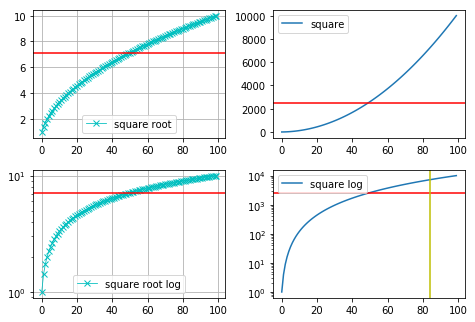

In [2]:
import matplotlib.pyplot as plt
from math import sqrt

plt.figure(1)  # First figure. Everything is plotted here until plt.figure() is called again.

plt.subplot(221)  # 2 rows, 2 col, 1st subplot
plt.plot([sqrt(x) for x in list(range(1,101))], label="square root", linewidth=0.8, color="c", marker="x")
# plt.ylim(-0.05, 0.05)
plt.legend(loc="lower center")
plt.axhline(sqrt(50), color="r")
plt.grid(True)

plt.subplot(222)
plt.plot([x**2 for x in list(range(1,101))], label="square")
plt.legend()
plt.axhline(50**2, color="r")
# plt.ylim(-0.05, 0.05)

plt.subplot(223)  # 2 rows, 1 col, 1st subplot
plt.plot([sqrt(x) for x in list(range(1,101))], label="square root log", linewidth=0.8, color="c", marker="x")
# plt.ylim(-0.05, 0.05)
plt.legend(loc="lower center")
plt.yscale("log")  # logarithmic scale
plt.axhline(sqrt(50), color="r")
plt.grid(True)

plt.subplot(224)
plt.plot([x**2 for x in list(range(1,101))], label="square log")
plt.legend()
plt.yscale("log")  # logarithmic scale
plt.axhline(50**2, color="r")
plt.axvline(84.17, color="y")
# plt.ylim(-0.05, 0.05)

# von wo nach wo, height/width space between
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.25, wspace=0.25)  

## 6. Finance

In [ ]:
# import numpy as np
def sharpe_ratio(returns, rf):
    return (np.mean(returns) - rf) / np.std(returns)

## 7. Euler-specific funtions

In [ ]:
# problem 21 and 23
from math import sqrt

def proper_divisors(n):
    """
    Finds the proper divisors of an integer n>1 as defined above and returns them in a list.
    """
    div = [1]
    top = int(sqrt(n))+1
    for i in range(2, top):
        if n%i == 0:
            div.append(int(i))
            div.append(int(n/i))
    return sorted(set(div))

def d(n):
    return sum(proper_divisors(n))

In [ ]:
# problem 21
# define proper_divisors(n) first
def amic_below(n):
    """
    Finds amicable numbers below x
    and returns them in a list.
    """
    amic = []
    for i in range(2, n):
        for j in range(i+1, n):
            if sum(proper_divisors(i)) == sum(proper_divisors(j)):
                amic.append(i)
                amic.append(j)
    return sorted(list(set(amic)))

In [ ]:
# problem 35
import itertools as it
"""Get integer digit permutations."""
p = 280 # some integer
perm_generator = it.permutations(str(p))
perm_int_list = [int(''.join(x)) for x in perm_generator]
perm_int_list
## Beware of ze zero!
[x for x in perm_int_list if len(str(x))==len(str(p))]

## 8. Others

In [ ]:
def digitsum(number):
    """Returns the sum of digits of a number."""
    return sum([int(digit) for digit in str(number)])

In [ ]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2
    fair_area = height * len(list_of_values) / 2
    return (fair_area - area) / fair_area

In [2]:
from decimal import Decimal, getcontext
getcontext().prec = 25  # ~ Nachkommastellen
Decimal(1) / Decimal(7)  # out: Decimal('0.1428571428571428571428571')
getcontext().prec = 35  
Decimal(1) / Decimal(7)  # out: Decimal('0.14285714285714285714285714285714286')

Decimal('0.14285714285714285714285714285714286')

In [ ]:
# Return x to the power y; 
# if z is present, return x to the power y, modulo z (computed more efficiently than pow(x, y) % z).
# The two-argument form pow(x, y) is equivalent to using the power operator: x**y.

pow(x, y[, z])

In [ ]:
# useful stuff:
# logical: set1 & set2, set1 | set2, set1 + set2, set1 - set2
# continue
# itertools
# itertools.chain([1,2], itertools.cycle([3,4]))  # 1, 2, 3, 4, 3, 4, 3, 4, ...
